PROJECT 2

PART (1) QUESTION (1.1) There are 4039 Nodes and 88234 Edges

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install python-igraph==0.9.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 44.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-igraph: filename=python_igraph-0.9.6-cp310-cp310-linux_x86_64.whl size=2555585 sha256=0ad94c4e50bb5d9b5ac4f45bc9d93bc0361ae7b0e2967442460333e0ed5b8bd3
  Stored in directory: /root/.cache/pip/wheels/ef/14/e6/4f7a42ad0b6bbf5eb65c6358c608065dd3646c2c3b01561e84
Successfully built python-igraph


In [4]:

!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cairocffi: filename=cairocffi-1.5.1-py3-none-any.whl size=90535 sha256=be120594b33f0b365981212861f0ee381549980e2eb983acf82a1e30e45857f1
  Stored in directory: /root/.cache/pip/wheels/3d/f0/15/e20ff54ef59ec58a08e230bd3874e6f412b09e6a3093f856a7
Successfully built cairocffi


In [ ]:
print(igraph.__version__)

In [3]:

import igraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

PART (1) QUESTION (1.2) The graph is connected:

In [5]:
path = '/content/gdrive/MyDrive/Colab Notebooks/232/Project_2/facebook_combined.txt'

# Load file
data = np.loadtxt(path, dtype=int)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['source', 'target'])

# Create graph
g = igraph.Graph.DataFrame(df, directed=False)

# Print the graph summary
print(g.summary())

IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)


In [ ]:
# Check if the graph is connected
if g.is_connected():
    print("The graph is connected!")
else:
    print("The graph is not connected!")
        # Get the size of the GCC
    gcc = g.clusters().giant()
    print("The size of the GCC is:", gcc.vcount())

The graph is connected!


PART 1 QUESTION (2)

In [ ]:
# Find the diameter of the graph
diameter = g.diameter()
print("The diameter of the graph is:", diameter)

The diameter of the graph is: 8


PART 1 QUESTION (3)

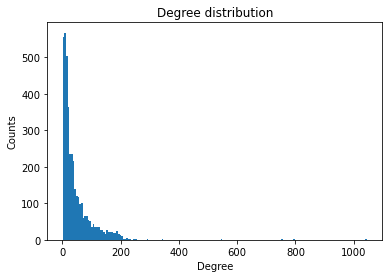

The average degree of the graph is: 43.69101262688784


In [ ]:
# Compute the degree of each vertex in the graph
degree = g.degree()

# Compute the degree distribution
degree_dist = g.degree_distribution()

# Plot the degree distribution
plt.hist(degree, 'auto')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

# Report the average degree
avg_degree = sum(degree) / len(degree)
print("The average degree of the graph is:", avg_degree)

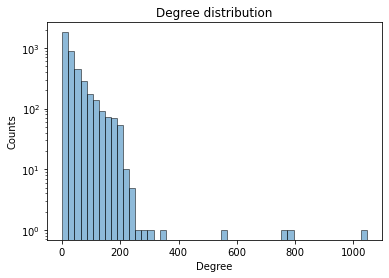

The slope of the linear fit is:  -0.21303107322226497
slope is  -0.2130310732222649


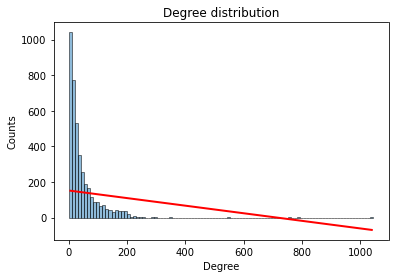

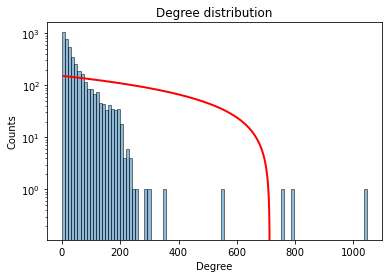

In [ ]:
# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=50, log=True, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=100, log=False, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')

# Fit a linear model to the log-transformed data
x = bins[:-1] + np.diff(bins) / 2
y = counts
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
print("The slope of the linear fit is: ", slope)

# Plot the linear fit
xfit = np.linspace(min(x), max(x), 1000)
yfit = slope * xfit + intercept
plt.plot(xfit, yfit, 'r-', lw=2)

# recheck slope
slope = (yfit[100] - yfit[0])/(xfit[100]-xfit[0])
print('slope is ',slope)

plt.show()

# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=100, log=True, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')

plt.plot(xfit, yfit, 'r-', lw=2)

plt.show()

-----------------PART 2--------------------------------

PART 2 QUESTION (5)

In [ ]:
node_id = 0
node_neighbors = g.neighbors(node_id)
node_neighbors.append(node_id)
personalized_network = g.induced_subgraph(node_neighbors)

print(personalized_network.summary())

IGRAPH UN-- 348 2866 -- 
+ attr: name (v)


There are 348 Nodes, and 2866 Edges.

PART 2 QUESTION (6)

In [ ]:
diameter = personalized_network.diameter()
print(diameter)

2


The upper bound of the diameter is 2, since the network is defined as a node and it's immediate neighbors, then any 2 nodes will be connected by at most 2 edges through node 0.

For the lower bound, if node 0 is connected to all of its neighbors and all of its neighbors are connected to each other, then the lower bound of the diameter is 1.

PART 2 QUESTION (7)

For the upper bound, this would mean that their exists 2 nodes that are not connected to each other but are connected through node 0. So the shortest path between the nodes is 2 edges, making the diameter 2.

For the lower bound, it means that node 0 is directly connected to all of its neighbors, and all of its neighbors are directly connected to each other. The network would be a complete graph, and there is a direct path of length 1 between any two nodes in the personalized network.

Part 2 Question (8)

In [ ]:
degrees = g.degree()

# count the number of nodes with degree greater than 200
count = 0
total_deg = 0
for degree in degrees:
    if degree > 200:
        count += 1
        total_deg+= degree
total_deg /= count

In [ ]:
count

40

In [ ]:
total_deg

279.375

Part 2 Question 9


In [ ]:
!apt install libcairo2-dev
!pip install pycairo

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo

In [ ]:
print(igraph.__version__)

In [ ]:
#!pip install python-igraph==0.9.6

In [ ]:
import igraph

In [ ]:
import tqdm

In [ ]:
#core_nodes = [1, 108, 349, 484, 1087]
core_nodes = [0, 107,348,483,1086]
memberships_fg = []
memberships_im = []
memberships_eb = []
fg = []
eb=[]
im=[]
fg_vc=[]
eb_vc=[]
im_vc = []
pns=[]
for node in core_nodes:
    print(node)
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    pns.append(personal_net)
    print(personal_net.is_connected())
    print(personal_net.summary())
    print(g.summary())
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg.append(fg_clusters)
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    eb.append(eb_clusters)
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    im.append(im_clusters)
    layout = personal_net.layout("fr")

    #fig, ax = plt.subplots()
    #layout = eg[i].layout("fr")
    #fc = eg[i].community_fastgreedy().as_clustering()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    fg_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=fg_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = eb_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    eb_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=eb_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = im_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    im_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=fg_color, layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=eb_color, layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=im_color, layout=layout)
    #need help plotting.
    #igraph.plot(fg_clusters, vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, vertex_color=[im_clusters.membership], layout=layout)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=[im_clusters.membership], layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

0
True
IGRAPH UN-- 348 2866 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 0:
Fast-Greedy modularity score: 0.413
Edge-Betweenness modularity score: 0.353
Infomap modularity score: 0.389
107
True
IGRAPH UN-- 1046 27795 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 107:
Fast-Greedy modularity score: 0.436
Edge-Betweenness modularity score: 0.507
Infomap modularity score: 0.508
348
True
IGRAPH UN-- 230 3441 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 348:
Fast-Greedy modularity score: 0.252
Edge-Betweenness modularity score: 0.134
Infomap modularity score: 0.095
483
True
IGRAPH UN-- 232 4525 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 483:
Fast-Greedy modularity score: 0.507
Edge-Betweenness modularity score: 0.489
Infomap modularity score: 0.515
1086
True
IGRAPH UN-- 206 7409 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 1086:
Fast-Greedy mo

In [ ]:
layouts = []
for node in core_nodes:
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    layouts.append(personal_net.layout("fr"))

In [ ]:
for i in range(len(pns)):
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=fg[i], vertex_size=3, vertex_color=fg_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "core_node_"+str(core_nodes[i])+"_fg.png"
    plt.savefig(string)
    plt.clf()
    #igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_eb.png",)
    #igraph.plot(pns[i], mark_groups=im[i], vertex_size=3, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_im.png",)
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(len(pns)):
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "core_node_"+str(core_nodes[i])+"_eb.png"
    plt.savefig(string)
    
    plt.clf()
    #igraph.plot(pns[i], mark_groups=im[i], vertex_size=3, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_im.png",)
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(len(pns)):
    if i!=4:
        fig, ax = plt.subplots()
        igraph.plot(pns[i], mark_groups=im[i], vertex_size=5, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=ax)
        string = "core_node_"+str(core_nodes[i])+"_im.png"
        plt.savefig(string)
        plt.clf()

    #igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_eb.png",)
    #
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
pns[0]

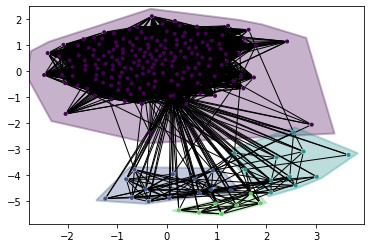

In [ ]:
fig, ax = plt.subplots()

igraph.plot(pns[4], mark_groups=im[4], vertex_size=3,edge_arrow_size=.05,vertex_label="", layout=layouts[4],target=ax)
#plt.savefig('test.png')

#igraph.plot(pns[0], mark_groups=eb[0], vertex_size=3, vertex_color=eb_vc[0],vertex_label="", layout=layouts[0],target=ax)

    

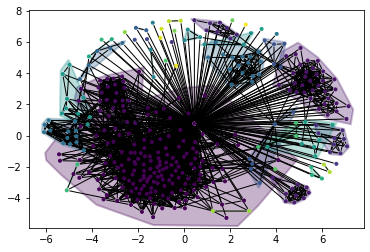

In [ ]:
fig, ax = plt.subplots()
igraph.plot(pns[0], mark_groups=eb[0], vertex_size=3, vertex_color=eb_vc[0],vertex_label="", layout=layouts[0],target=ax)

    

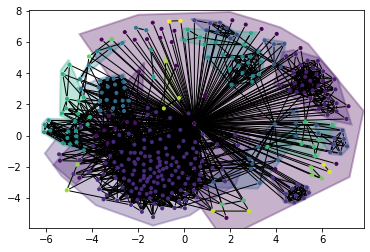

In [ ]:
fig, ax = plt.subplots()
igraph.plot(pns[0], mark_groups=im[0], vertex_size=3, vertex_color=im_vc[0],vertex_label="", layout=layouts[0],target=ax)

    

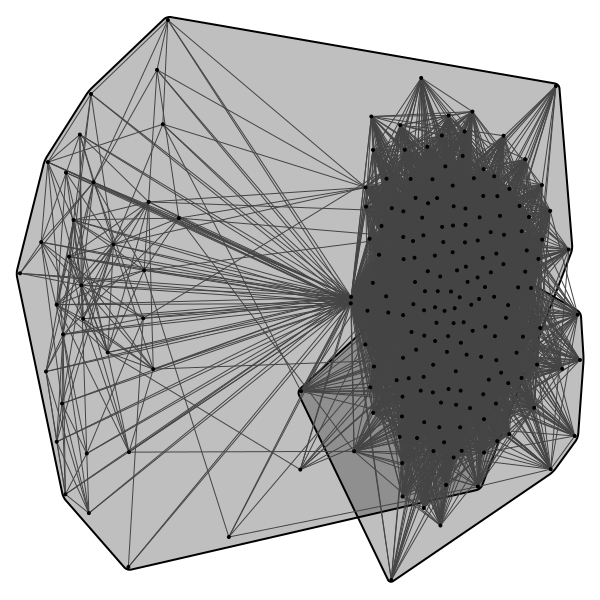

In [ ]:
igraph.plot(personal_net, mark_groups=fg_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)

In [ ]:
igraph.plot(personal_net, mark_groups=eb_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)

In [ ]:
igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)

In [ ]:
#core_nodes = [1, 108, 349, 484, 1087]
core_nodes = [0, 107,348,483,1086]

for node in core_nodes:
    print(node)
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    print(personal_net.is_connected())
    print(personal_net.summary())
    print(g.summary())
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    #layout = eg[i].layout("fr")
    #fc = eg[i].community_fastgreedy().as_clustering()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=fg_clusters, target=f"core_node_{node}_fg.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = eb_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=eb_clusters, target=f"core_node_{node}_eb.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = im_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, target=f"core_node_{node}_im.png", vertex_color=vertex_color, vertex_label="", layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

In [ ]:
#core_nodes = [1, 108, 349, 484, 1087]
core_nodes = [0, 107,348,483,1086]

for node in core_nodes:
    print(node)
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    print(personal_net.is_connected())
    print(personal_net.summary())
    print(g.summary())
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    #layout = eg[i].layout("fr")
    #fc = eg[i].community_fastgreedy().as_clustering()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=fg_clusters, target=f"core_node_{node}_fg.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = eb_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=eb_clusters, target=f"core_node_{node}_eb.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = im_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, target=f"core_node_{node}_im.png", vertex_color=vertex_color, vertex_label="", layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

Part 2 Question 10

In [ ]:
core_nodes = [0, 107,348,483,1086]

for node in core_nodes:
    #temp_g = g.delete_vertices(node)
    #personal_net = g.neighborhood(node, order=1)
    personal_net = g.induced_subgraph(g.neighborhood(node, order=1))

    #personal_net.delete_vertices(node)

    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    igraph.plot(fg_clusters, mark_groups=True)
    igraph.plot(eb_clusters, mark_groups=True)
    igraph.plot(im_clusters, mark_groups=True)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=[im_clusters.membership], layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

In [ ]:
#core_nodes = [1, 108, 349, 484, 1087]
core_nodes = [0, 107,348,483,1086]
memberships_fg = []
memberships_im = []
memberships_eb = []
fg = []
eb=[]
im=[]
fg_vc=[]
eb_vc=[]
im_vc = []
pns=[]
layouts=[]
for node in core_nodes:
    print(node)
    personal_net = g.induced_subgraph(g.neighborhood(node, order=1))
    pns.append(personal_net)
    print(personal_net.is_connected())
    print(personal_net.summary())
    print(g.summary())
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg.append(fg_clusters)
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    eb.append(eb_clusters)
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    im.append(im_clusters)
    layout = personal_net.layout("fr")
    layouts.append(layout)

    #fig, ax = plt.subplots()
    #layout = eg[i].layout("fr")
    #fc = eg[i].community_fastgreedy().as_clustering()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    fg_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=fg_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = eb_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    eb_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=eb_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = im_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    im_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=fg_color, layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=eb_color, layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=im_color, layout=layout)
    #need help plotting.
    #igraph.plot(fg_clusters, vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, vertex_color=[im_clusters.membership], layout=layout)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=[im_clusters.membership], layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

0
True
IGRAPH UN-- 348 2866 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 0:
Fast-Greedy modularity score: 0.413
Edge-Betweenness modularity score: 0.353
Infomap modularity score: 0.389
107
True
IGRAPH UN-- 1046 27795 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 107:
Fast-Greedy modularity score: 0.436
Edge-Betweenness modularity score: 0.507
Infomap modularity score: 0.508
348
True
IGRAPH UN-- 230 3441 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 348:
Fast-Greedy modularity score: 0.252
Edge-Betweenness modularity score: 0.134
Infomap modularity score: 0.204
483
True
IGRAPH UN-- 232 4525 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 483:
Fast-Greedy modularity score: 0.507
Edge-Betweenness modularity score: 0.489
Infomap modularity score: 0.515
1086
True
IGRAPH UN-- 206 7409 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 1086:
Fast-Greedy mo

In [ ]:
for i in range(len(pns)):
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=fg[i], vertex_size=3, vertex_color=fg_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "no_core_node_"+str(core_nodes[i])+"_fg.png"
    plt.savefig(string)
    plt.clf()
    #igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_eb.png",)
    #igraph.plot(pns[i], mark_groups=im[i], vertex_size=3, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_im.png",)
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(len(pns)):
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "no_core_node_"+str(core_nodes[i])+"_eb.png"
    plt.savefig(string)
    
    plt.clf()
    #igraph.plot(pns[i], mark_groups=im[i], vertex_size=3, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_im.png",)
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(len(pns)):
    #if i!=4:
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=im[i], vertex_size=5, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "no_core_node_"+str(core_nodes[i])+"_im.png"
    plt.savefig(string)
    plt.clf()

    #igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_eb.png",)
    #
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Question 11

The embeddedness between the core node and the target node is equal to the degree of the target node plus one.

In [ ]:
import igraph
import numpy as np
import matplotlib.pyplot as plt

core_nodes = [0, 107,348,483,1086]

for node_id in core_nodes:
    personal_net = g.subgraph(g.neighborhood(node_id, order=1))
    neighbors = personal_net.neighbors(node_id)
    embeddedness_values = []
    dispersion_values = []
    for neighbor_id in neighbors:
        current_node_neighbors = personal_net.neighbors(neighbor_id)

        neighbor_indices = [i for i, v in enumerate(neighbors) if v in current_node_neighbors]
        embeddedness = len(neighbor_indices)-1
        modified_net = personal_net.copy()
        modified_net.delete_vertices([node_id, neighbor_id])
        if len(current_node_neighbors) > 1:
            dispersion = np.sum(modified_net.shortest_paths(current_node_neighbors)) / (len(current_node_neighbors) * (len(current_node_neighbors) - 1))
        else:
            dispersion = 0
        embeddedness_values.append(embeddedness)
        dispersion_values.append(dispersion)
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].hist(embeddedness_values, bins=np.arange(min(embeddedness_values), max(embeddedness_values) + 1, 1))
    axs[0].set_title(f"Embeddedness Distribution for Core Node {node_id}")
    axs[0].set_xlabel("Embeddedness")
    axs[0].set_ylabel("Count")
    axs[1].hist(dispersion_values, bins=np.arange(min(dispersion_values), max(dispersion_values) + 1, 1))
    axs[1].set_title(f"Dispersion Distribution for Core Node {node_id}")
    axs[1].set_xlabel("Dispersion")
    axs[1].set_ylabel("Count")
    plt.tight_layout()
    plt.show()


In [ ]:

node_list_str = ["0", "348", "483", "1086", "107"]

for j in range(len(node_list_str)):
    nodelist = g.neighborhood(node_list_str[j], order=1, mode="all")
    pn = g.induced_subgraph(nodelist)
    pn.vs["name"] = sorted(nodelist)
    embeddedness = []
    disp = []
    deg = []
    i = 0
    for v in pn.vs["name"]:
        if v == node_list_str[j]:
            continue

        disp.append(0)
        neh_ver = pn.neighbors(node_list_str[j])
        neh_core = pn.neighbors(v)
        inter = set(neh_ver).intersection(neh_core)
        embeddedness.append(len(inter))

        deg.append(pn.degree(v))
        eg2 = pn.copy()
        eg2.delete_vertices([node_list_str[j], v])
        if len(inter) > 1:
            ver = [pn.vs[inter[m]]["name"] for m in range(len(inter))]
            ver1 = [eg2.vs.find(name)["name"] for name in ver]
            disp_mat = eg2.shortest_paths(source=ver1, target=ver1)
            disp_mat[disp_mat==float('inf')] = pn.diameter() + 1
            disp[i] = sum(disp_mat)
        i += 1

    igraph.plot(ig.Histogram(embeddedness), main=f"Embeddedness Histogram, Node ID: {int(node_list_str[j])+1}", xlab="Embeddedness", ylab="Frequency")
    igraph.plot(ig.Histogram(disp), main=f"Dispersion Histogram, Node ID: {int(node_list_str[j])+1}", xlab="Dispersion", ylab="Frequency")


QUESTION 16:

In [25]:
node = 415 - 1
g.vs["name"] = [str(i) for i in range(g.vcount())]
personal_net = g.subgraph(g.neighborhood(node, order=1))
degrees = personal_net.degree()

# get the nodes with 24 degrees
count = 0
total_deg = 0
Nr = []
for i,degree in enumerate(degrees):
    if degree == 24:
        count += 1
        Nr.append(personal_net.vs['name'][i])

print("nodes are : ",Nr)
print("length is : ",count)

nodes are :  ['496', '578', '600', '615', '618', '627', '643', '658', '659', '661', '662']
length is :  11


In [23]:
# function to compute common neighbors measure
def common_neighbors(graph, node1, node2):
    return len(set(graph.neighbors(node1)).intersection(set(graph.neighbors(node2))))

# function to compute Jaccard measure
def jaccard(graph, node1, node2):
    s1 = set(graph.neighbors(node1))
    s2 = set(graph.neighbors(node2))
    intersection = len(s1.intersection(s2))
    union = len(s1.union(s2))
    return intersection / union if union != 0 else 0

# function to compute Adamic-Adar measure
def adamic_adar(graph, node1, node2):
    s1 = set(graph.neighbors(node1))
    s2 = set(graph.neighbors(node2))
    common_neighbors = s1.intersection(s2)
    adamic_adar = 0
    for node in common_neighbors:
        degree = len(graph.neighbors(node))
        adamic_adar += 1 / np.log(degree) if degree > 1 else 0
    return adamic_adar

In [41]:
# function to compute the average accuracy for a user using a given measure
def compute_accuracy(graph, user, measure):
    iters = 10
    total_accuracy = 0
    for i in range(iters):
        # randomly remove 25% of user's friends
        removed_friends = np.random.choice(list(graph.neighbors(user)), size=int(graph.degree(user) * 0.25),replace=False)
        graph.delete_edges([(user, friend) for friend in removed_friends])
        
        # recommend new friends using the given measure
        recommended_friends = {}
        for node in graph.vs:
            if node.index != user and node.index not in graph.neighbors(user):
                if measure == 'common_neighbors':
                    recommended_friends[node.index] = common_neighbors(graph, user, node.index)
                elif measure == 'jaccard':
                    recommended_friends[node.index] = jaccard(graph, user, node.index)
                elif measure == 'adamic_adar':
                    recommended_friends[node.index] = adamic_adar(graph, user, node.index)
        
        # pick t nodes with the highest score and recommend as friends
        t = len(removed_friends)
        top_friends = sorted(recommended_friends, key=recommended_friends.get, reverse=True)[:t]
        graph.add_edges([(user, friend) for friend in top_friends])
        
        # compute accuracy
        newly_added_friends = set(top_friends).intersection(set(removed_friends))
        accuracy = len(newly_added_friends) / len(removed_friends)
        total_accuracy += accuracy
        
    return total_accuracy / iters

In [42]:
acc_com = np.mean([compute_accuracy(personal_net, user, 'common_neighbors') for user in Nr])
acc_jac = np.mean([compute_accuracy(personal_net, user, 'jaccard') for user in Nr])
acc_adam = np.mean([compute_accuracy(personal_net, user, 'adamic_adar') for user in Nr])

print(acc_com, acc_jac, acc_adam)

0.9257137982338517 0.9223449411551016 0.9484672123776402


Adamic Adar friend recommendation is the best.

In [40]:
user = str(496)

graph = personal_net
print(list(graph.neighbors(user)))
removed_friends = np.random.choice(list(graph.neighbors(user)), size=int(graph.degree(user) * 0.25),replace=False)
print(removed_friends)
graph.delete_edges([(user, friend) for friend in removed_friends])
print(graph.vs['name'])

# len(set(graph.neighbors(node1)).intersection(set(graph.neighbors(node2))))

# print(common_neighbors(personal_net, user, node.index))

[1, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 30, 31, 32, 34, 36, 37, 38, 39, 43, 44, 45, 46, 51, 52, 54, 65, 74, 75, 80, 88, 89, 108, 109, 115, 117, 119, 121, 125, 132, 133, 136, 143, 150]
[ 22  80  19 119  46  11  52  34  51  45   5  43   6  37]
['34', '107', '173', '348', '363', '370', '373', '374', '376', '378', '391', '394', '395', '400', '412', '414', '422', '423', '427', '428', '431', '434', '436', '438', '461', '465', '475', '480', '483', '492', '496', '500', '506', '513', '514', '515', '524', '542', '544', '553', '556', '558', '559', '561', '563', '566', '567', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '584', '585', '586', '587', '588', '589', '590', '591', '592', '593', '594', '595', '596', '597', '598', '599', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625', '626', '627'